## Assignment 2: k nearest neighbor answers


**Question 1**

1) While both are considered supervised learning techniques, regression is used for predicting a continuous outcome and classification is used for predicting a discrete category.

2) A confusion matrix compares a classification model's predicted and true labels. Rather than providing a summary of the outputs/accuracy, it reveals a models errors.

3) Accuracy provides us with the correct number of predictions out of all the predictions made. However, it should be considered with other outputs because for imbalanced datasets it could be slightly misleading at times.

4) This measures the average magnitude of prediction errors about a particular model. In other words, it lets us know how different predictions may be compared to their true values.

5) Overfitting is when the model fits the training data well but generalizes poorly to new data, and underfitting is when the model performs poorly on both training and test data.

6) Because this helps prevent overfitting and we can find out which k performs best on the test data with variance but also without bias.

7) The advantages of predicting classes: makes it easy to interpret and use -
    Disadvantages of predicting classes: does not provide a lot of information on uncertainty - 
    Advantages of predicting probability distributions: more detailed information -
    Disadvantages of predicting probability distributions: more complex to interpret

**Question 2**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv("land_mines.csv")

df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [7]:
df["mine_type"].value_counts()

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

In [8]:
df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


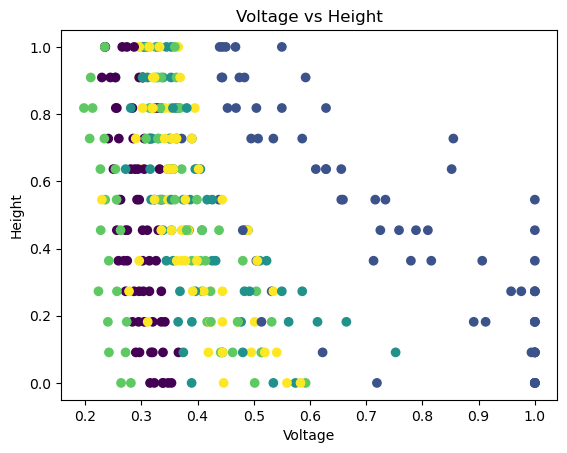

In [9]:
plt.figure()
plt.scatter(df["voltage"], df["height"], c=df["mine_type"])
plt.xlabel("Voltage")
plt.ylabel("Height")
plt.title("Voltage vs Height")
plt.show()

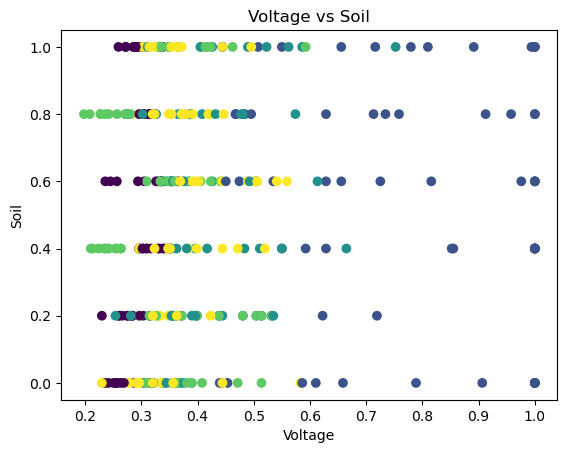

In [10]:
plt.figure()
plt.scatter(df["voltage"], df["soil"], c=df["mine_type"])
plt.xlabel("Voltage")
plt.ylabel("Soil")
plt.title("Voltage vs Soil")
plt.show()

1) There are 5 different mine types in the data set, and from the scatterplots you can infer that there is some variations across voltage, height, and soil measurements. 

In [11]:
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

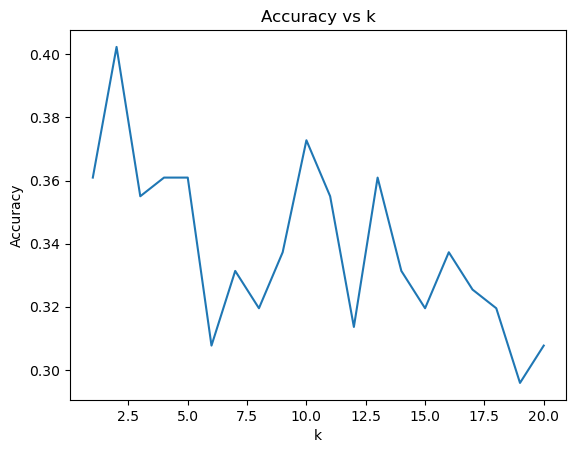

In [12]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()

In [13]:
best_k = k_values[np.argmax(accuracies)]
best_k

2

2) I tested the k values from 1 to 20 and chose the value that gave the highest test accuracy. This means the best k value, 2, is what balances bias and variance the best. 

In [14]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0, 18,  2,  0],
       [ 0, 25,  4,  4,  0],
       [ 8,  3, 16,  2,  3],
       [12,  5, 10,  7,  2],
       [ 8,  2, 12,  6,  3]])

In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.40236686390532544

4) The test set accuracy is 0.40.
5) Because of the accuracy, we can assume that this model should not be solely used to make any decisions. Some mine types are misclassified and this can be a danger to any decision making based off the model.

**Question 3**

In [18]:
df = pd.read_csv("USA_cars_datasets.csv")

df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [19]:
df = df[["price", "year", "mileage"]]

df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [20]:
df.isna().sum()

price      0
year       0
mileage    0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df["year"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [23]:
X = df[["year", "mileage"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k = 3
MSE = 148065935.51955554


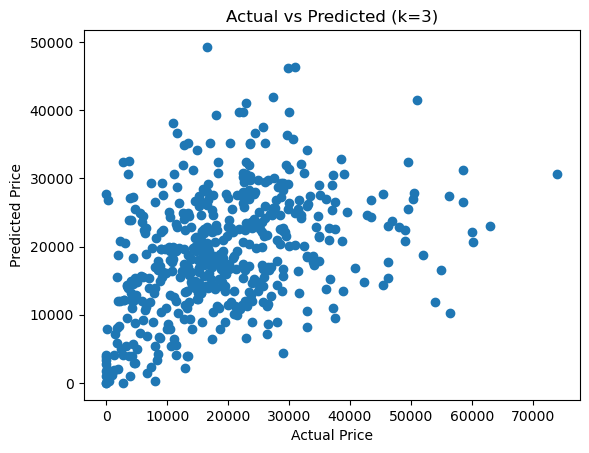

k = 10
MSE = 117399126.10604002


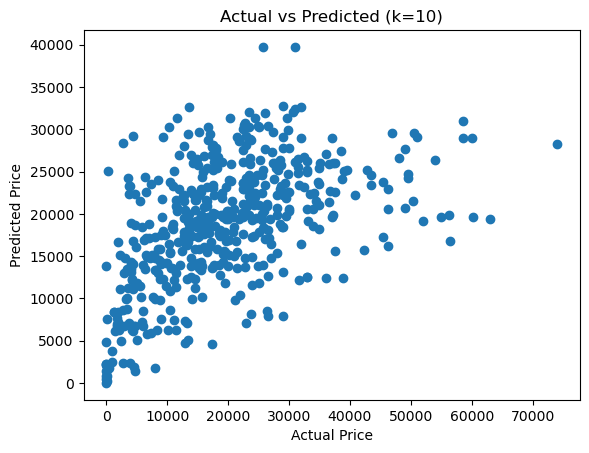

k = 25
MSE = 112576160.82390079


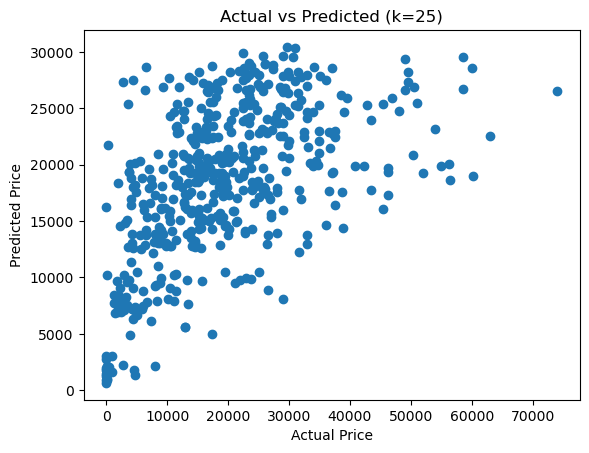

k = 50
MSE = 110202549.3014296


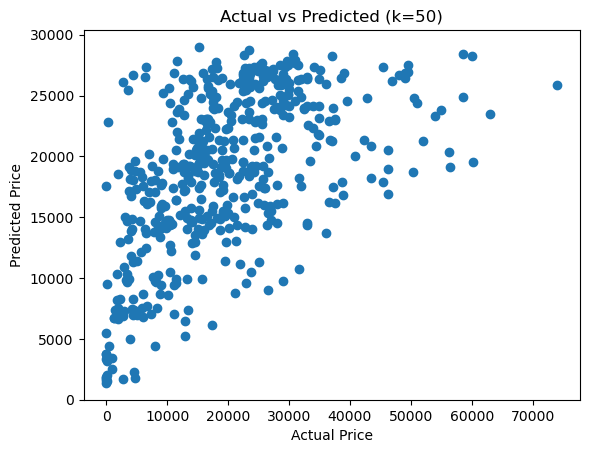

k = 100
MSE = 112253932.8184272


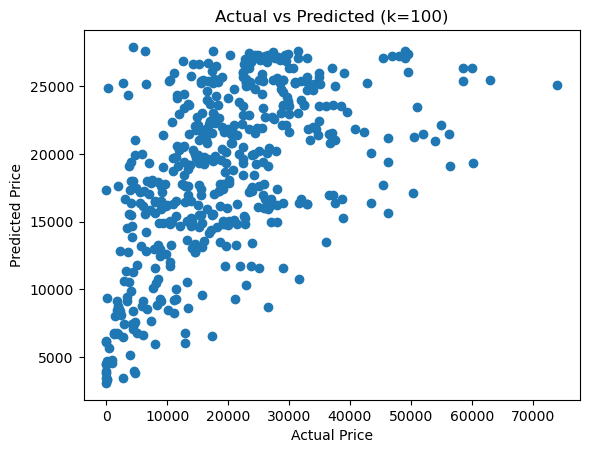

k = 300
MSE = 114496301.82933456


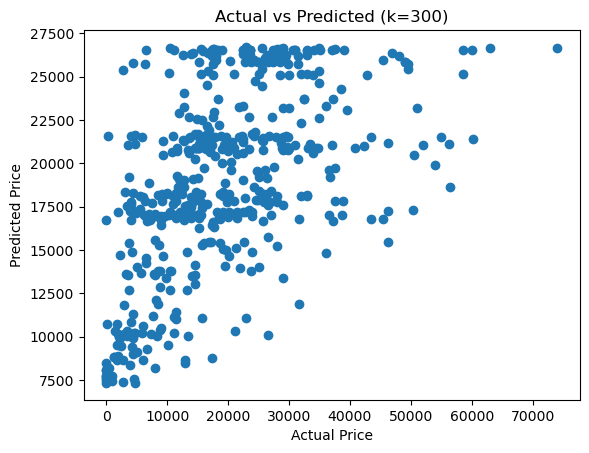

In [26]:
k_values = [3, 10, 25, 50, 100, 300]

mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    print("k =", k)
    print("MSE =", mse)
    
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted (k=" + str(k) + ")")
    plt.show()

4) As you increase k, the predictions seem to become easier to interpret and smoother. 

In [27]:
best_k = k_values[np.argmin(mse_values)]
best_k

50

5) The optimal k for this is 50.
6) For very small k values, there is a risk of overfitting, and with the larger k values there indicates underfitting with the model being too simple. 

**Question 6**

In [28]:
df = pd.read_csv("airbnb_hw.csv")

df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

df.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [40]:
missing_df = df.loc[df["Review Scores Rating"].isnull()].copy()
complete_df = df.dropna(axis=0, how="any").copy()

In [41]:
complete_df = complete_df.dropna(axis=0, how='any')

In [42]:
complete_df["Price"] = pd.to_numeric(complete_df["Price"], errors="coerce")
missing_df["Price"] = pd.to_numeric(missing_df["Price"], errors="coerce")

In [43]:
complete_df["Beds"] = pd.to_numeric(complete_df["Beds"], errors="coerce")
missing_df["Beds"] = pd.to_numeric(missing_df["Beds"], errors="coerce")

In [44]:
complete_df = complete_df.dropna()
missing_df = missing_df.dropna(subset=["Price", "Beds"])

In [45]:
print(complete_df.dtypes)
print(missing_df.dtypes)

Review Scores Rating    float64
Price                   float64
Beds                    float64
dtype: object
Review Scores Rating    float64
Price                   float64
Beds                    float64
dtype: object


In [47]:
price_min = complete_df["Price"].min()
price_max = complete_df["Price"].max()

beds_min = complete_df["Beds"].min()
beds_max = complete_df["Beds"].max()

complete_df["Price"] = (complete_df["Price"] - price_min) / (price_max - price_min)
complete_df["Beds"] = (complete_df["Beds"] - beds_min) / (beds_max - beds_min)

missing_df["Price"] = (missing_df["Price"] - price_min) / (price_max - price_min)
missing_df["Beds"] = (missing_df["Beds"] - beds_min) / (beds_max - beds_min)

In [48]:
X = complete_df[["Price", "Beds"]]
y = complete_df["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
k_values = [3, 5, 10, 25, 50, 100]
sse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    sse = mse * len(y_test)
    
    sse_values.append(sse)
    
    print("k =", k)
    print("SSE =", sse)

k = 3
SSE = 426042.2222222222
k = 5
SSE = 373407.28
k = 10
SSE = 338139.61
k = 25
SSE = 323863.2176
k = 50
SSE = 315126.9392
k = 100
SSE = 311713.848


In [50]:
best_k = k_values[np.argmin(sse_values)]
best_k

100

4) The value of k that minimized the SSE is 100 so that is the most optimal k. 

In [51]:
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X, y)

,n_neighbors,100
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
X_missing = missing_df[["Price", "Beds"]]

predicted_ratings = final_model.predict(X_missing)

missing_df["Predicted Rating"] = predicted_ratings

missing_df.head()

,Review Scores Rating,Price,Beds,Predicted Rating
0,NaN,0.136502,0.0625,93.94
1,NaN,0.027300,0.0625,88.34
2,NaN,0.018200,0.0625,86.70
3,NaN,0.191102,0.1875,88.44
13,NaN,0.058645,0.0625,90.75


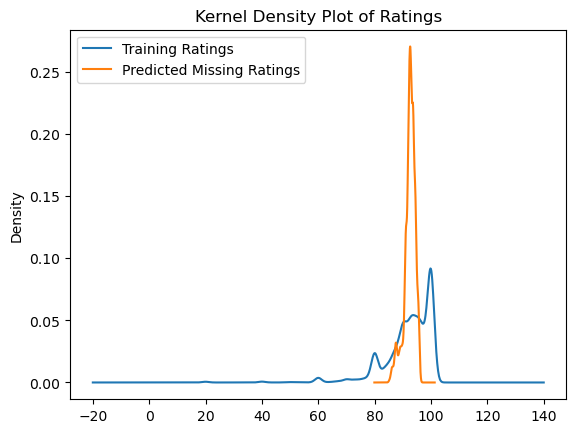

In [53]:
plt.figure()

complete_df["Review Scores Rating"].plot(kind='kde')
missing_df["Predicted Rating"].plot(kind='kde')

plt.legend(["Training Ratings", "Predicted Missing Ratings"])
plt.title("Kernel Density Plot of Ratings")
plt.show()

6) In the kernel density plot of ratings, the training ratings is much more spread out and the predicted missing ratings is more smooth and concentrated because there is less variance. 